## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [1]:
import pandas as pd

# TODO
# Absolútna cesta k súboru
file_path = r"D:\school\fri\4.rocnik\letny semester\Softverove spracovanie udajov\zadanie 1\data_heart_failure.csv"

# Načítanie CSV súboru
data_hf = pd.read_csv(file_path, delimiter=',', header=0)

# Zobrazenie prvých riadkov
data_hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

In [2]:
# TODO

# Počet chýbajúcich hodnôt, pre každý stĺpec
data_hf.isnull().sum()

# Dataset neobsahuje chýbajúce hodnoty

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

In [3]:
# TODO

# Typ vybraných premenných
data_hf[['age', 'anaemia', 'high_blood_pressure', 'serum_sodium', 'death_event']].dtypes

# Podľa tabuľky ani 1 premenná nie je správna, pretože pri čítaní csv súboru, nevie, že sa jedná o binárny typ, ale číselný

age                    float64
anaemia                  int64
high_blood_pressure      int64
serum_sodium             int64
death_event              int64
dtype: object

In [4]:
# Konverzia dátových typov podľa špecifikácie
data_hf['age'] = data_hf['age'].astype(int)
data_hf['anaemia'] = data_hf['anaemia'].astype(bool)
data_hf['creatinine_phosphokinase'] = data_hf['creatinine_phosphokinase'].astype(int)
data_hf['diabetes'] = data_hf['diabetes'].astype(bool)
data_hf['ejection_fraction'] = data_hf['ejection_fraction'].astype(int)
data_hf['high_blood_pressure'] = data_hf['high_blood_pressure'].astype(bool)
data_hf['platelets'] = data_hf['platelets'].astype(float)  # Continuous = float
data_hf['serum_creatinine'] = data_hf['serum_creatinine'].astype(float)
data_hf['serum_sodium'] = data_hf['serum_sodium'].astype(int)
data_hf['sex'] = data_hf['sex'].astype(bool)
data_hf['smoking'] = data_hf['smoking'].astype(bool)
data_hf['time'] = data_hf['time'].astype(int)
data_hf['death_event'] = data_hf['death_event'].astype(bool)

# Overenie dátových typov po konverzii
print(data_hf.dtypes)

age                           int64
anaemia                        bool
creatinine_phosphokinase      int64
diabetes                       bool
ejection_fraction             int64
high_blood_pressure            bool
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                            bool
smoking                        bool
time                          int64
death_event                    bool
dtype: object


**Obsahuje dataset duplicitné záznamy?**

In [5]:
# TODO
print(data_hf.duplicated().sum())

# Dataset neobsahuje duplicitné záznamy

0


### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [6]:
# TODO
#data_hf['sex'].dtype

data_hf['sex'].head()

0     True
1     True
2     True
3     True
4    False
Name: sex, dtype: bool

**Koľko záznamov mužov a žien obsahuje dataset?**

In [7]:
# TODO
# Zistenie počtu žien a mužov
pocet_zien = (data_hf['sex'] == False).sum()
pocet_muzov = (data_hf['sex'] == True).sum()

print(f"Počet žien: {pocet_zien}")
print(f"Počet mužov: {pocet_muzov}")

Počet žien: 105
Počet mužov: 194


**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

In [8]:
# TODO
# Zistenie počtu žien a mužov nefajciarov
zeny_no_smoke = ((data_hf['sex'] == False) & (data_hf['smoking'] == False)).sum()
muzi_no_smoke = ((data_hf['sex'] == True) & (data_hf['smoking'] == False)).sum()

print(f"Počet nefajčiarok (ženy): {zeny_no_smoke}")
print(f"Počet nefajčiarov (muži): {muzi_no_smoke}")

Počet nefajčiarok (ženy): 101
Počet nefajčiarov (muži): 102


### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [9]:
# TODO
data_hf['age'].describe()
# Premenná vek je typu INT, a vyjadruje vek pacienta

count    299.000000
mean      60.829431
std       11.894997
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

In [10]:
# TODO
print(f"Minimálny vek: {data_hf['age'].min()}")
print(f"Maximálny vek: {data_hf['age'].max()}")
print(f"Priemerný vek: {data_hf['age'].mean()}")

Minimálny vek: 40
Maximálny vek: 95
Priemerný vek: 60.82943143812709


**Z akého veku je v datasete najviac záznamov?**

In [11]:
# TODO
print(f"Najčastejší vek v datasete je: {data_hf['age'].mode()[0]}")

Najčastejší vek v datasete je: 60


### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

In [12]:
# Pridanie premennej 'risk'
data_hf['risk'] = data_hf.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

data_hf.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event,risk
0,75,False,582,False,20,True,265000.00,1.9,130,True,False,4,True,High
1,55,False,7861,False,38,False,263358.03,1.1,136,True,False,6,True,Low
2,65,False,146,False,20,False,162000.00,1.3,129,True,True,7,True,High
3,50,True,111,False,20,False,210000.00,1.9,137,True,False,7,True,Low
4,65,True,160,True,20,False,327000.00,2.7,116,False,False,8,True,High
5,90,True,47,False,40,True,204000.00,2.1,132,True,True,8,True,High
6,75,True,246,False,15,False,127000.00,1.2,137,True,False,10,True,Low
7,60,True,315,True,60,False,454000.00,1.1,131,True,True,10,True,Low
8,65,False,157,False,65,False,263358.03,1.5,138,False,False,10,True,High
9,80,True,123,False,35,True,388000.00,9.4,133,True,True,10,True,High


Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

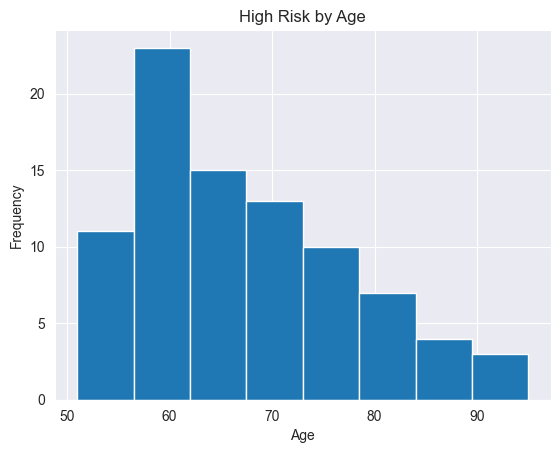

In [13]:
import matplotlib.pyplot as plt
# TODO

# Vizualizácia
high_risk = data_hf[data_hf['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**V akom veku je riziko zlyhania srdca najväčšie?**

In [ ]:
# TODO
# V 60 rokoch

**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

In [ ]:
# TODO
# Približne 24 záznamov

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


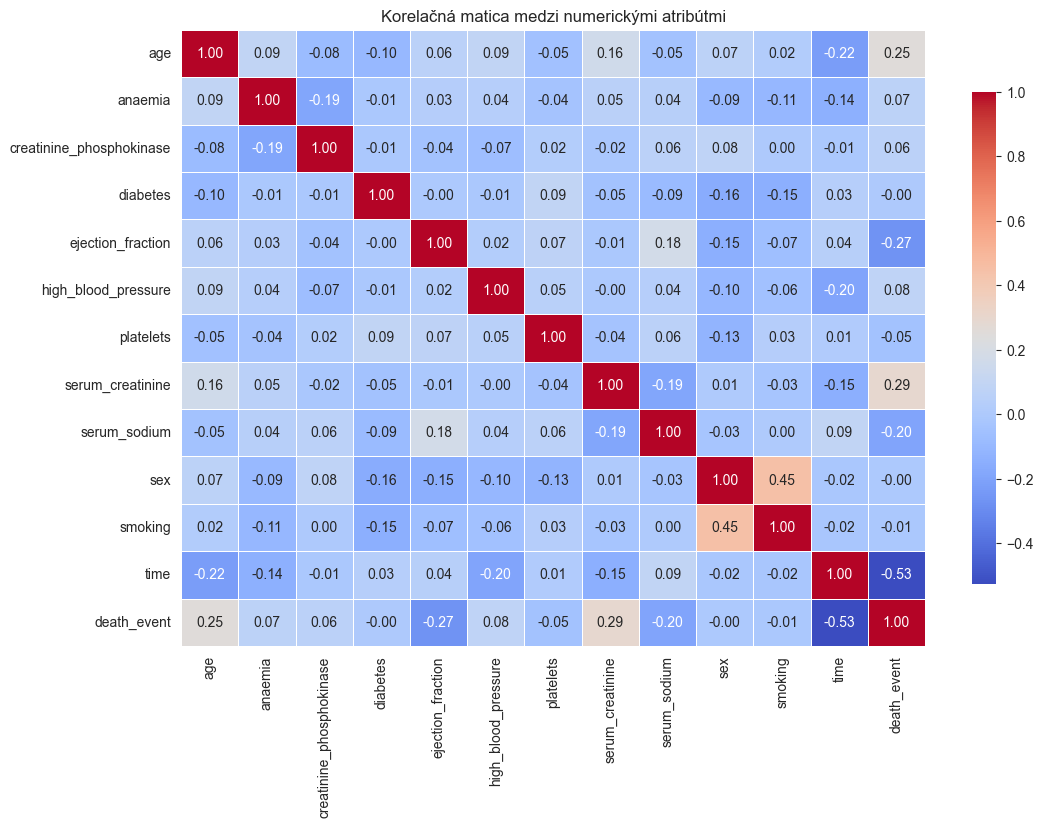

In [14]:
# TODO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prevod binárnych hodnôt True/False na 1/0
binary_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']
data_hf[binary_columns] = data_hf[binary_columns].astype(int)

# 2. # Vyberáme len numerické stĺpce
data_numerical = data_hf.select_dtypes(include=['int64', 'float64']) 

# 3. Vytvorenie korelačnej matice
corr_matrix = data_numerical.corr()

# 4. Vizualizácia korelačnej matice pomocou heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Korelačná matica medzi numerickými atribútmi')
plt.show()

**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

In [ ]:
# TODO
# Atribúty time-death_event(-53) a ejection_fraction-death_event(-27) majú najväčšiu zápornú koreláciu

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

In [ ]:
# TODO
# Atribúty sex-smoking(-53) a serum_creation-death_event(-27) majú najväčšiu kladnú koreláciu

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure